## **Importing the libraries required**

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd # DataFrame Manipulation
import numpy as np # Linear Algebra

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [3]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### Dataset Shape

In [7]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### Check Column Dtypes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

There are **no duplicate values** in the data.

### **Dropping the unique values column**

In [10]:
data = data.drop(["Booking_ID"], axis=1)

In [11]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [12]:
data.describe() 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Average price ranges from $0-540 with an average of $103

The data was collected from 2017-2018 (may have potential impact depending on time period)

Over 2% of guests are repeats (maybe satisfaction thus lower chance of cancellation)

Average of 0.8 weekend nights and 2.2 week nights

On average people book 85 days ahead of arrival (potential corr between preperation and cancellatiion, or maybe more time for events to change)

## **Exploratory Data Analysis**

Data Distributions

In [13]:
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

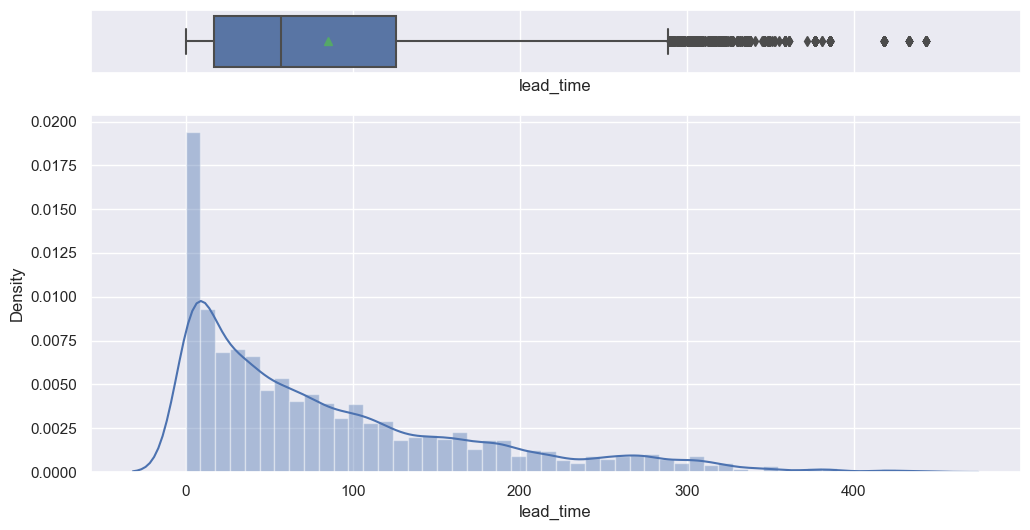

In [14]:
hist_box(data,'lead_time') 

Right Skew: Mean> Median

Lots of outliers slightly greater than the 3rd quartile

More people tend to have lower lead times than longer lead times

Highest is the first box from 0 to about 10 with a density of almost 0.02

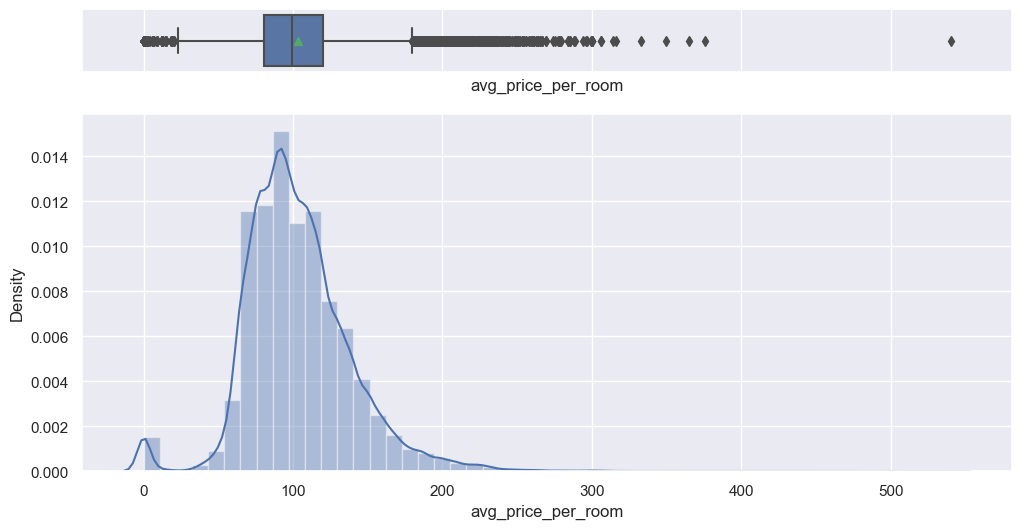

In [15]:
hist_box(data,'avg_price_per_room')

Large range: Outliers on both sides

High distribution towards the center

Density of over 0.014 at abot $100 avg price

Distribution plot looks healvily right skewed

In [16]:
# Price = 0 is null
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [17]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [18]:
# 25th Quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# 75th Quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Upper Whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [19]:
# Outliers
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Distribution of the categorical variables**

**Number of Children**

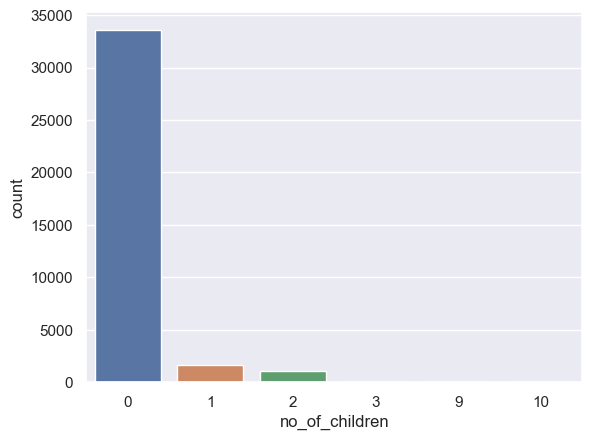

In [20]:
sns.countplot(data['no_of_children'])
plt.show()

In [21]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [22]:
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

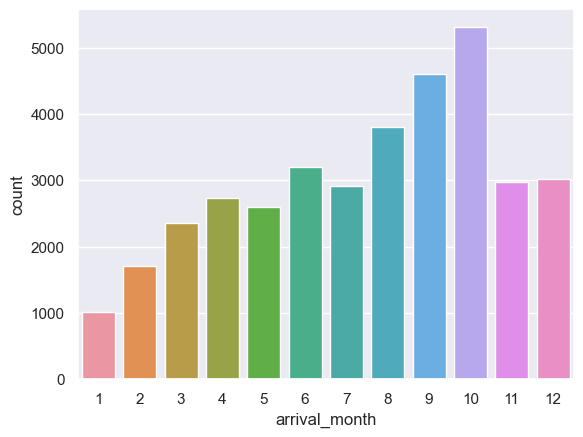

In [23]:
sns.countplot(data["arrival_month"])
plt.show()

In [24]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

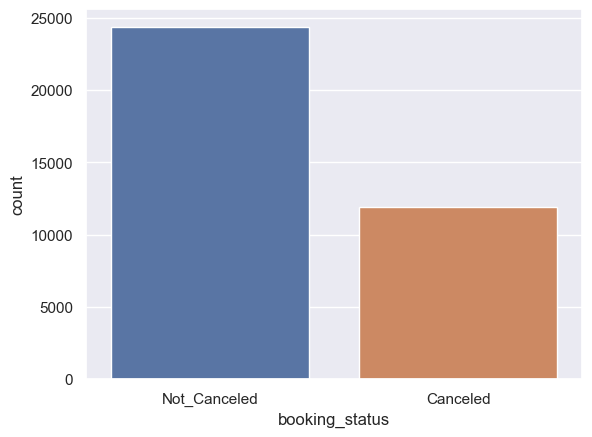

In [25]:
sns.countplot(data["booking_status"])
plt.show()

In [26]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [27]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Correlatiion Between Features

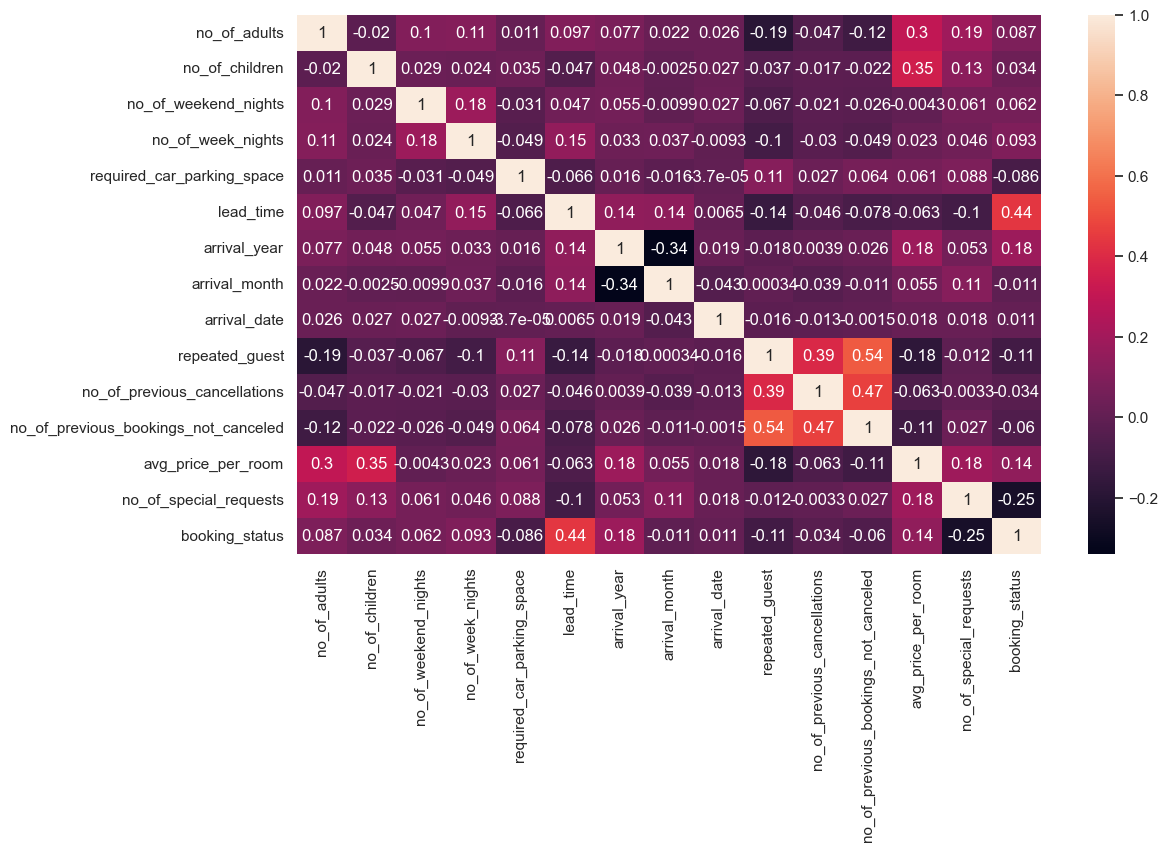

In [28]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot=True)
plt.show()

Repeated guests and previous uncancelled bookings have a strong positive correlation: 0.54

Comparatively, repeated guests and previous cancelled bookings have a weaker positive correlation of 0.39.

Most repeated guests did not cancel their bookings last time.

Booking status and special requests have a strong negative correlation. Number of requests have heavy influence on cancellations.

Repeated guests have lower avg price per room. -0.18 corr.

Season (month) doesn't have much impact on cancellations. 

**See how prices vary across different demographics**

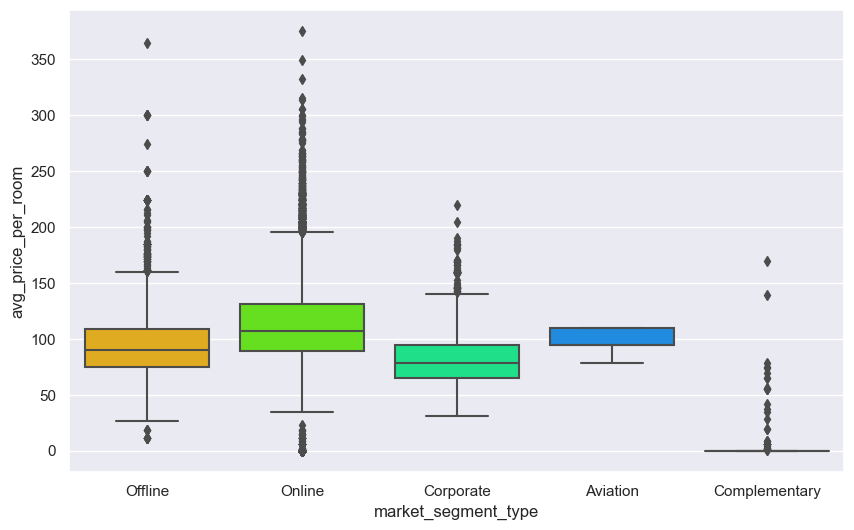

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

In [30]:
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

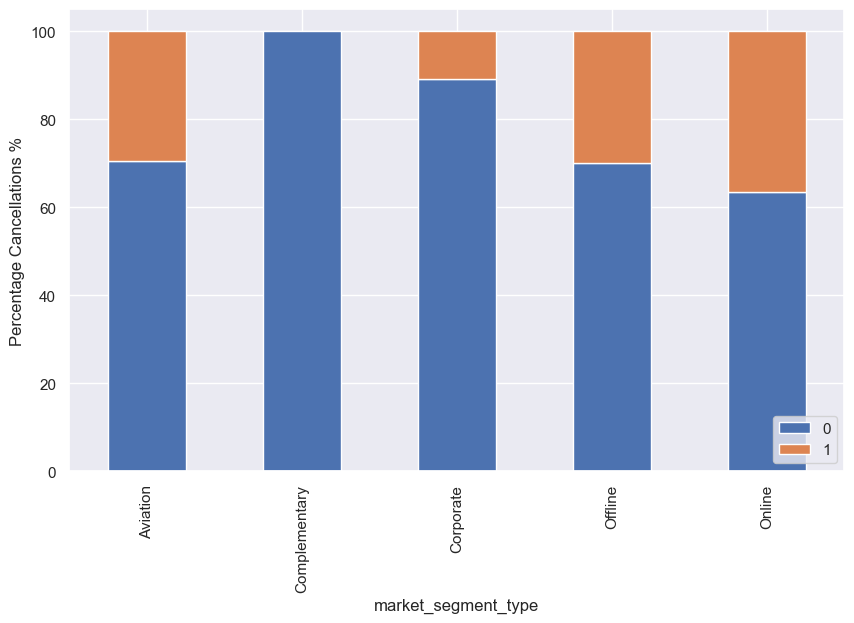

In [31]:
stacked_barplot(data,'market_segment_type','booking_status')

Most cancellations are for online followed by offline then aviation. 

Offline and aviation show a similar percentage of cancellations.

Complementary had no cancellations. 

Over 30% of online market segment types cancelled.

About 30% of offline and aviation market segment types cancelled.

About 10% of corporate market segment types cancelled. 

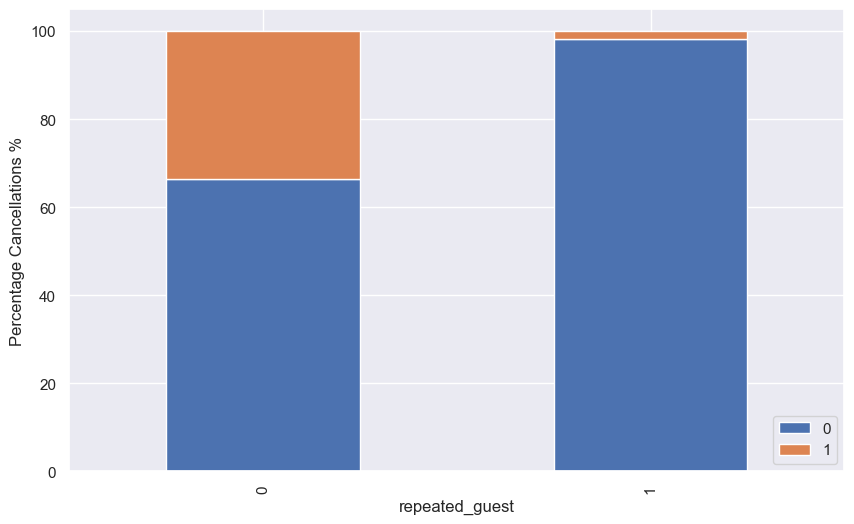

In [32]:
stacked_barplot(data,'repeated_guest','booking_status')

- A very small percentage of repeating guests cancelled
    - Less than about 5%
- Over 30% of first time guests cancelled
- Makes sense
    - Repeating guests only return if service was good

**Customer who stayed for at least a day.**

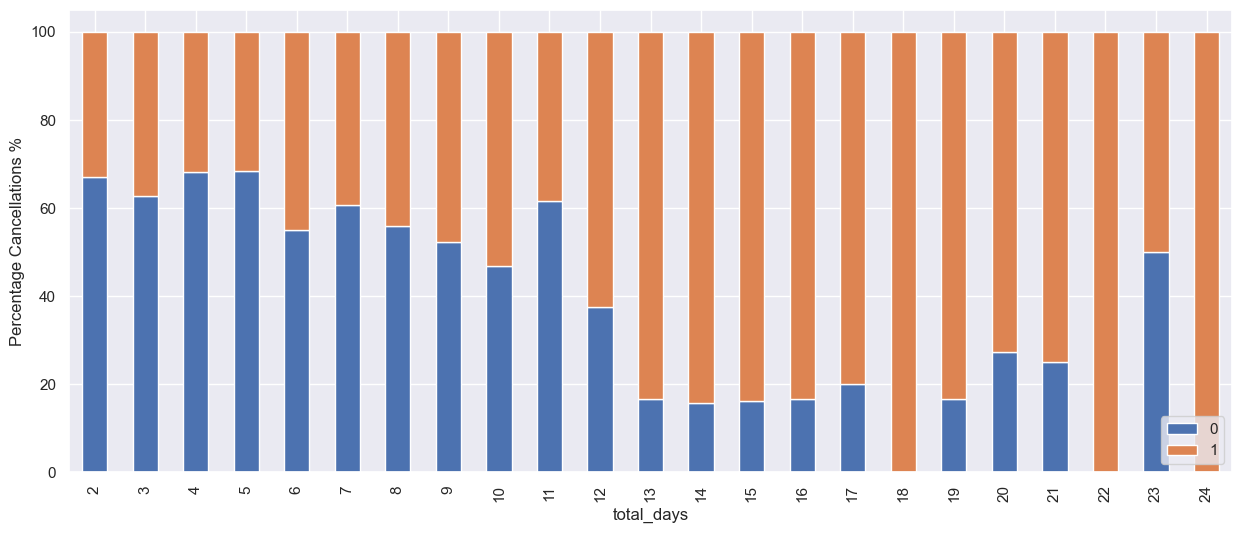

In [33]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**Month vs Price**

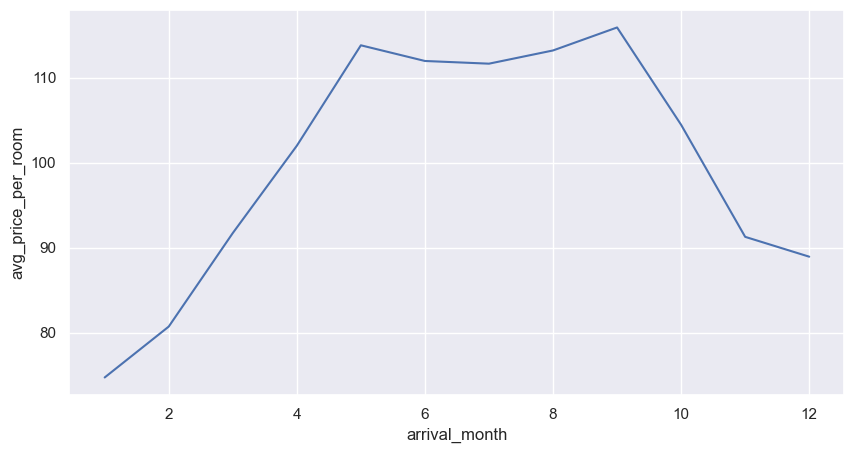

In [34]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [35]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

In [36]:
# Splitting data in train and test sets 70/30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [37]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


In [38]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

# Logistic Regression

In [39]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17073
           1       0.73      0.60      0.66      8319

    accuracy                           0.80     25392
   macro avg       0.77      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



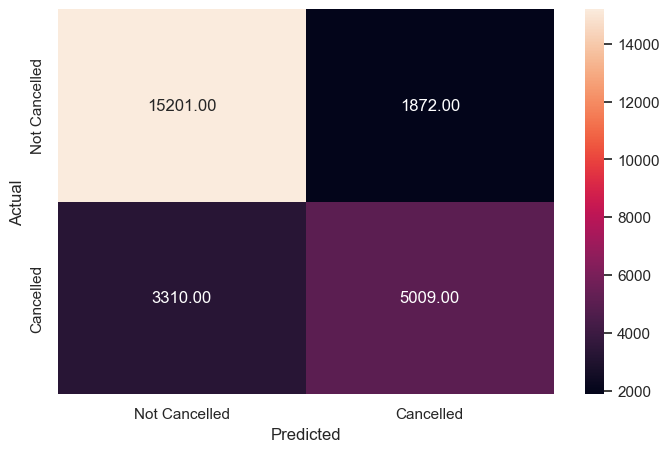

In [40]:
y_pred_train = lg.predict(X_train)
metrics_score(y_train,y_pred_train)

Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.72      0.59      0.65      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.79     10883



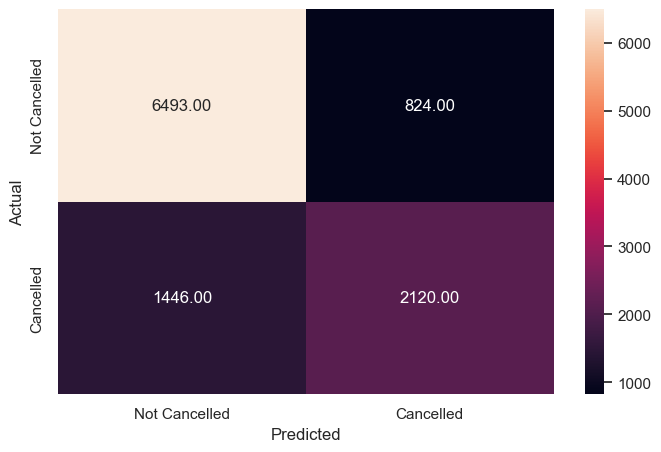

In [41]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test,y_pred_test)

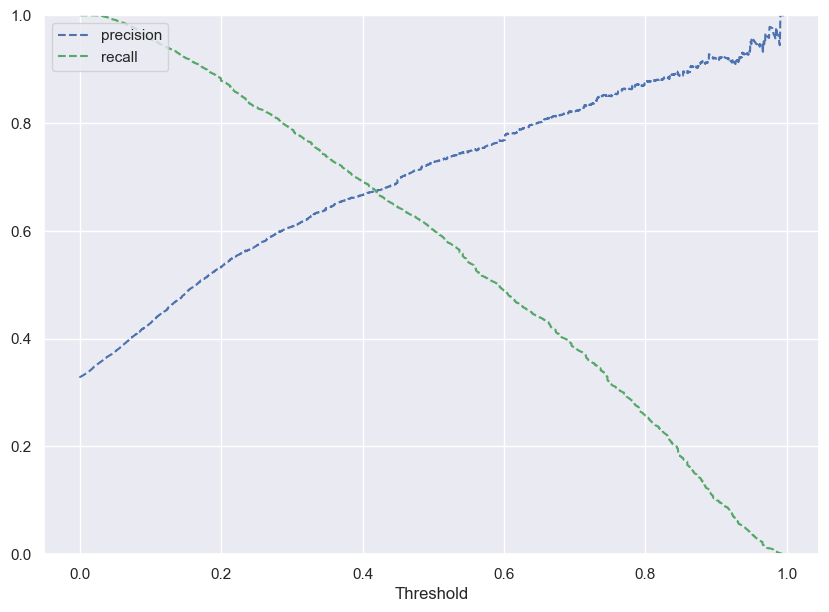

In [42]:
y_scores_lg=lg.predict_proba(X_train)[:,1]

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train,y_scores_lg)

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Optimal Threshold about 0.42

In [43]:
# Setting the optimal threshold
optimal_threshold = 0.42


              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.67      0.67      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



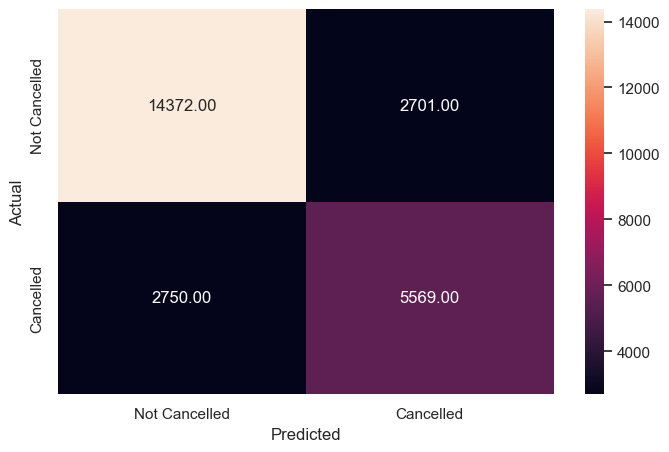

In [44]:
y_pred_train = lg.predict_proba(X_train)[:,1]
metrics_score(y_train,y_pred_train>optimal_threshold)

Better at predicting type 1, f1-score: 0.67

but slight decrease at predicting type 0, f1-score: 0.84

Equal precision-recall ratio


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.66      0.66      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



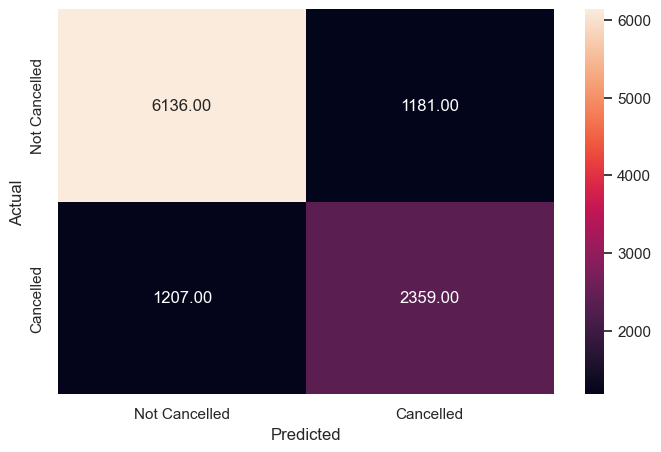

In [45]:
y_pred_test = lg.predict_proba(X_test)[:,1]
metrics_score(y_test,y_pred_test>optimal_threshold)

very balanced precision-recall ratio

0.84 f1 score for predicitng type 0

0.66 f1 score for predicting type 1

# SVM

In [46]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [47]:
svm = SVC(kernel="linear",probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled,y_train)

#### **Evaulation**

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



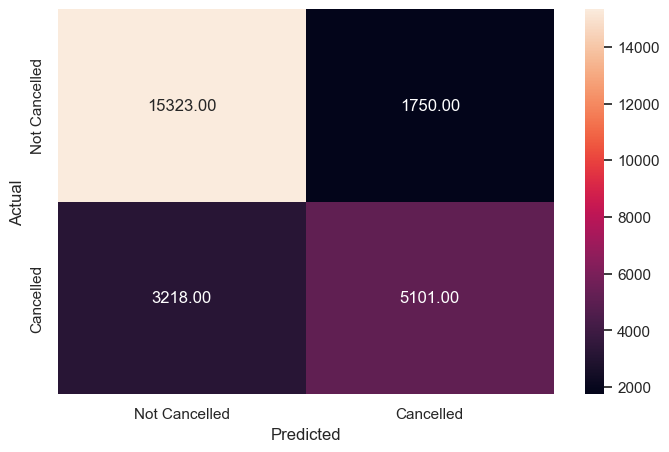

In [48]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train,y_pred_train_svm)

0.86 f1 score for type0

0.67 f1 score for type 1

Test Results

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



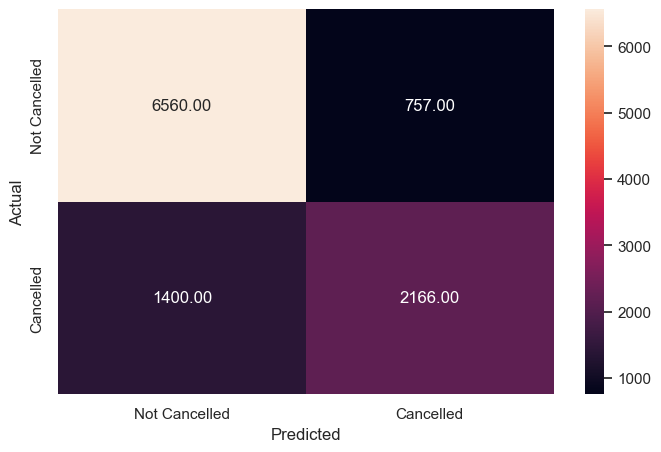

In [49]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test,y_pred_test_svm)

0.86 f1 score for type 0

0.67 f1 score for type 1

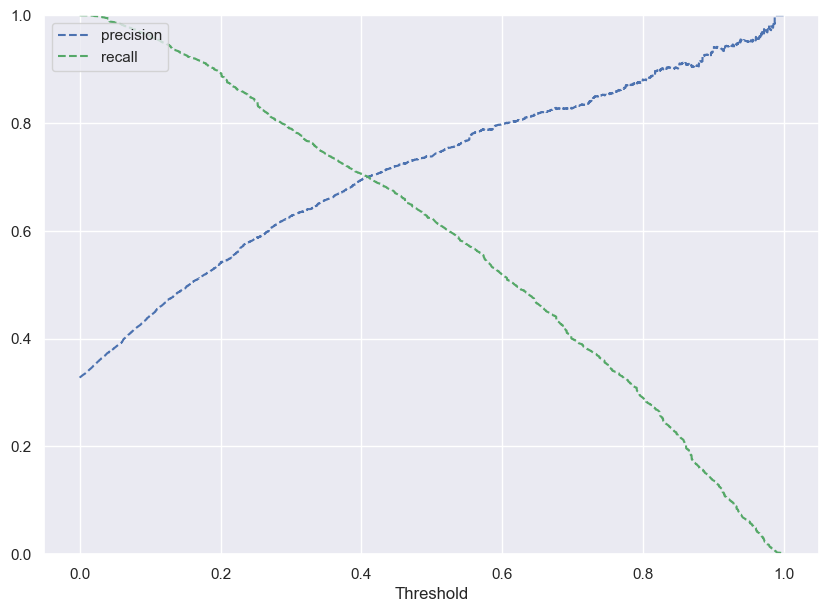

In [50]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)[:,1]

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train,y_scores_svm)

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [51]:
optimal_threshold_svm= 0.41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



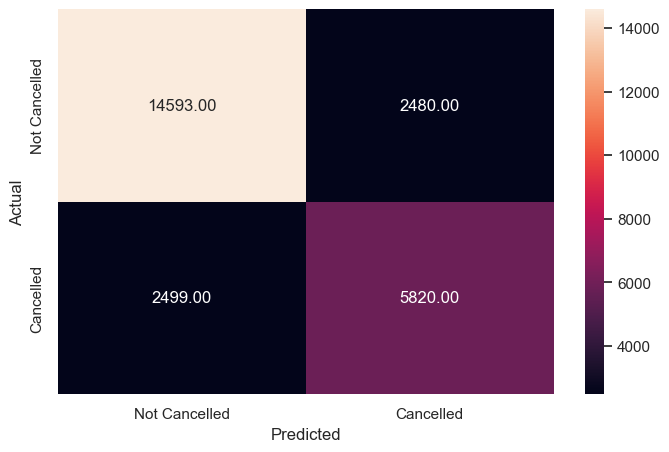

In [52]:
y_pred_train_svm = model.predict_proba(X_train_scaled)[:,1]
metrics_score(y_train,y_pred_train_svm>optimal_threshold_svm)

0.85 f1 score for type 0

0.870 f1 score for type 1

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7317
           1       0.69      0.70      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



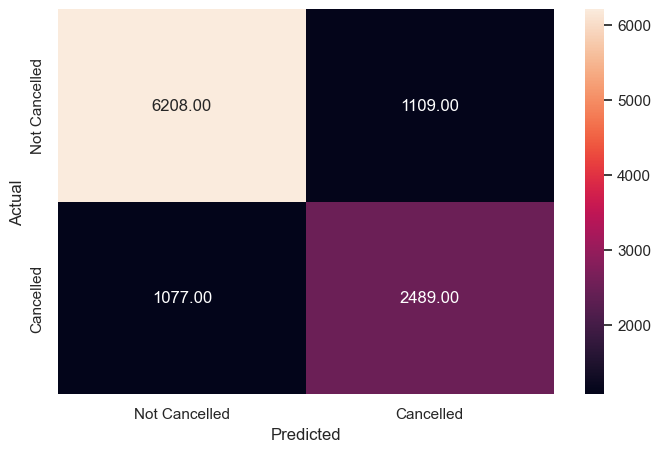

In [53]:
y_pred_test = model.predict_proba(X_test_scaled)[:,1]
metrics_score(y_test,y_pred_test>optimal_threshold_svm)

0.85 f1 score for type 0

0.69 f1 score for type 1

In [54]:
svm_rbf=SVC(kernel="rbf",probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



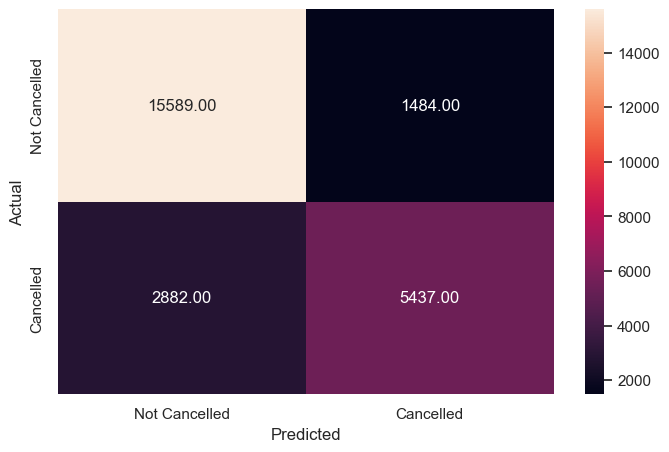

In [55]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train,y_pred_train_svm)

0.88 f1 score for type 0

0.71 f1 score for type 1

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



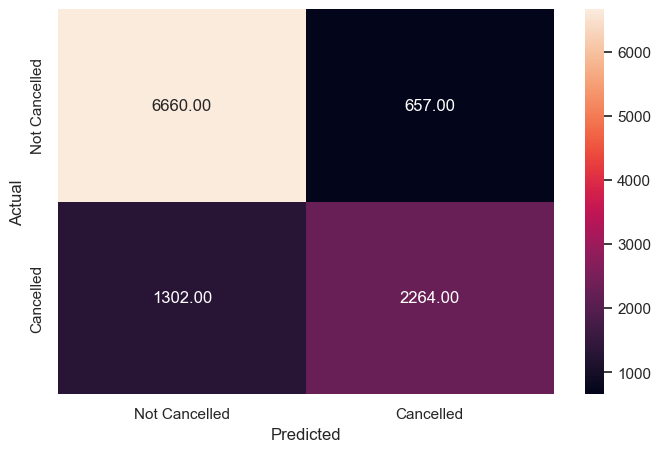

In [56]:
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test,y_pred_test)

0.87 f1 score for type 0

0.70 f1 score for type 1

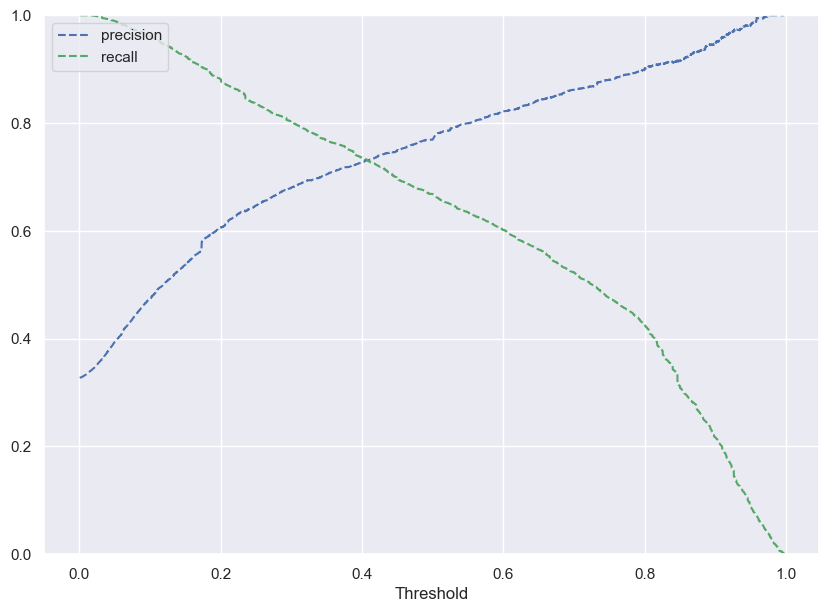

In [57]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [58]:
optimal_threshold_svm= 0.41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



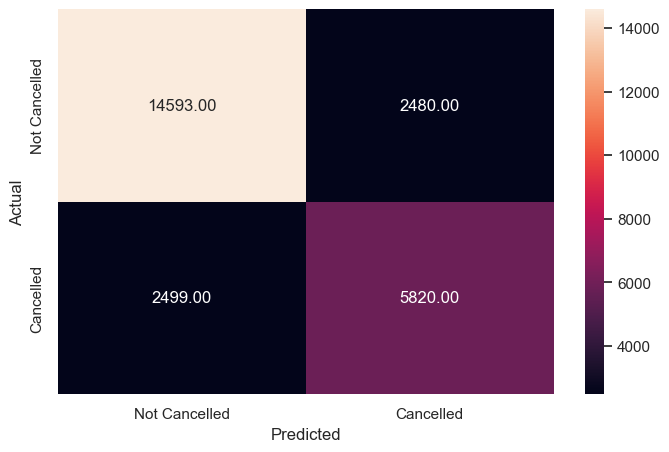

In [59]:
y_pred_train_svm = model.predict_proba(X_train_scaled)[:,1]
metrics_score(y_train,y_pred_train_svm>optimal_threshold_svm)

0.85 f1 score for type 0

0.70 f1 score for type 1

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7317
           1       0.72      0.72      0.72      3566

    accuracy                           0.81     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.81      0.81      0.81     10883



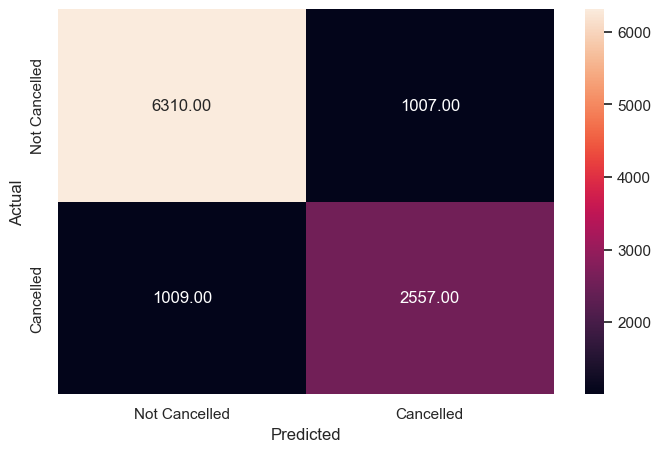

In [60]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)[:,1]
metrics_score(y_test,y_pred_test>optimal_threshold_svm)

0.86 f1 score for type 0

0.72 f1 score for type 1

# Decision Tree

In [61]:
model_dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17073
           1       0.99      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



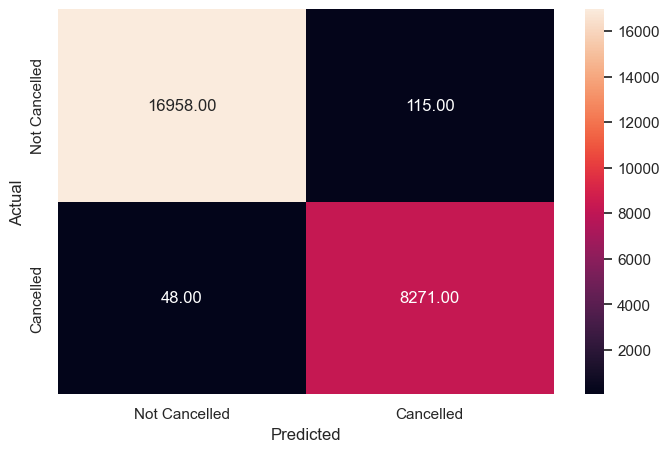

In [62]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train,pred_train_dt)

1.0 f1 score for type 0

0.99 f1 score for type 1

overfit

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7317
           1       0.78      0.79      0.79      3566

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



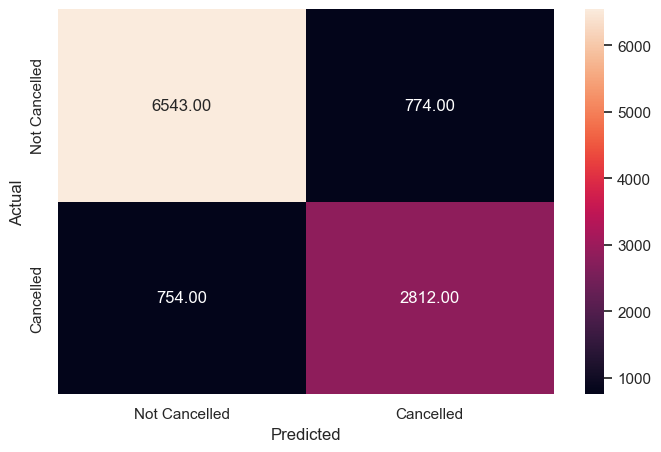

In [63]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test,pred_test_dt)

0.90 f1 score for type 0

0.79 f1 score for type 1

In [64]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator,parameters,cv=10)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79     17073
           1       0.58      0.84      0.68      8319

    accuracy                           0.75     25392
   macro avg       0.74      0.77      0.74     25392
weighted avg       0.79      0.75      0.75     25392



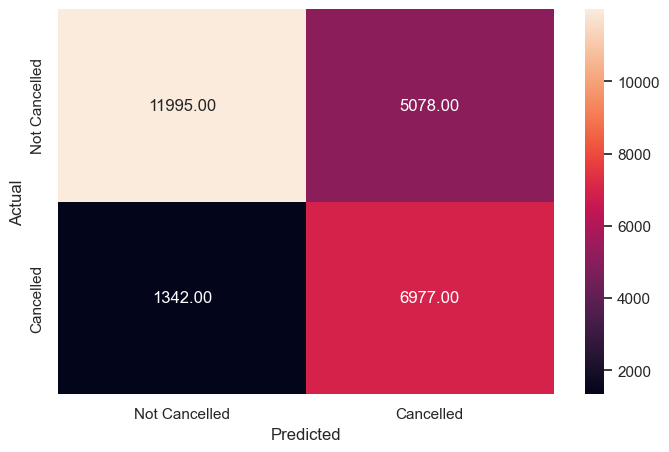

In [65]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

0.79 f1 score for type 0

0.68 f1 score for type 1

less overfit

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      7317
           1       0.58      0.83      0.68      3566

    accuracy                           0.75     10883
   macro avg       0.74      0.77      0.74     10883
weighted avg       0.79      0.75      0.76     10883



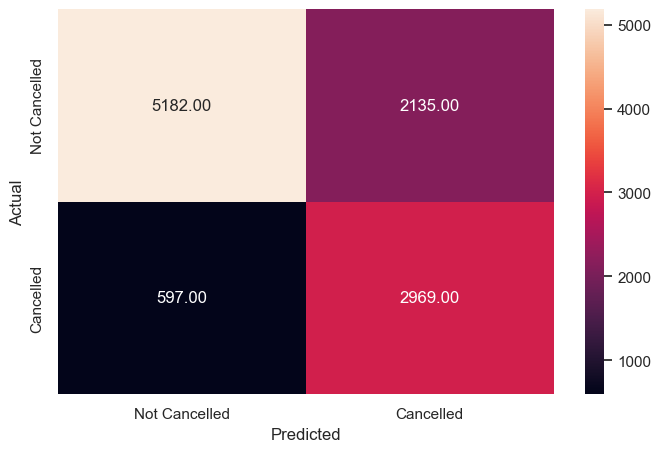

In [66]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

0.79 f1 score for type 0

0.68 f1 score for type 1

#### **Visualizing the Decision Tree**

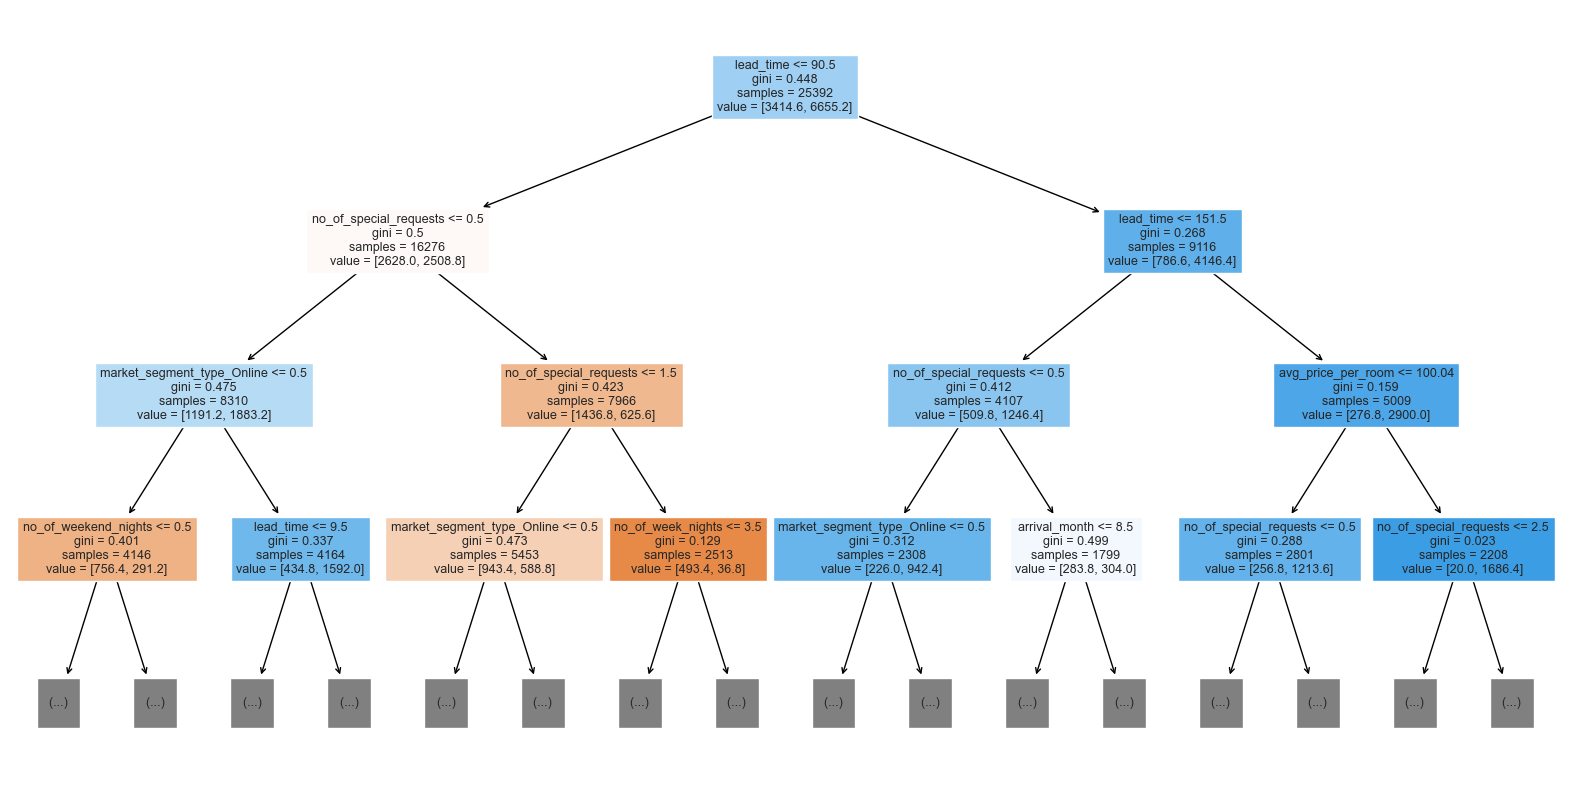

In [67]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Feature Importance

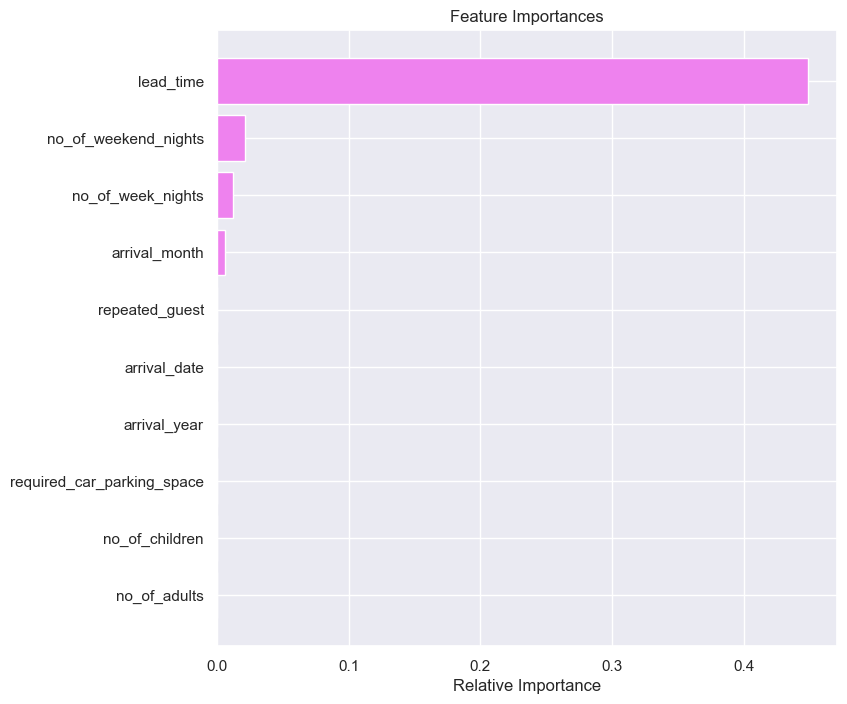

In [70]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances[:10])

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead time was most important

followed by market segment type

then special requests

only other vars that had noticable impact were price, no of nights and arrival month

___

# Random Forest

In [71]:
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17073
           1       0.98      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



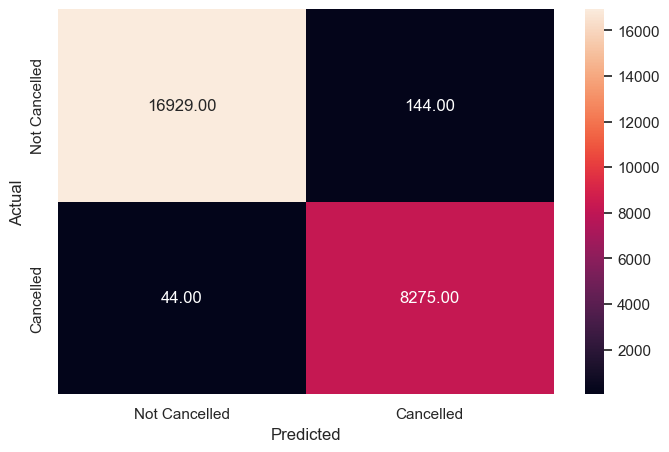

In [72]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train_rf)

F1 Score for type 0 is 0.99

F1 Score for type 1 is also .99

overfit

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



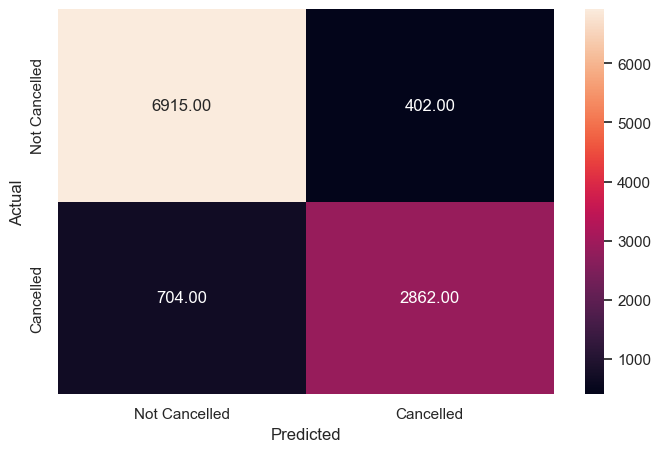

In [73]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test_rf)

F1 Score for type 0 is 0.93

F1 Score for type 1 is 0.84


#### Feature Importance

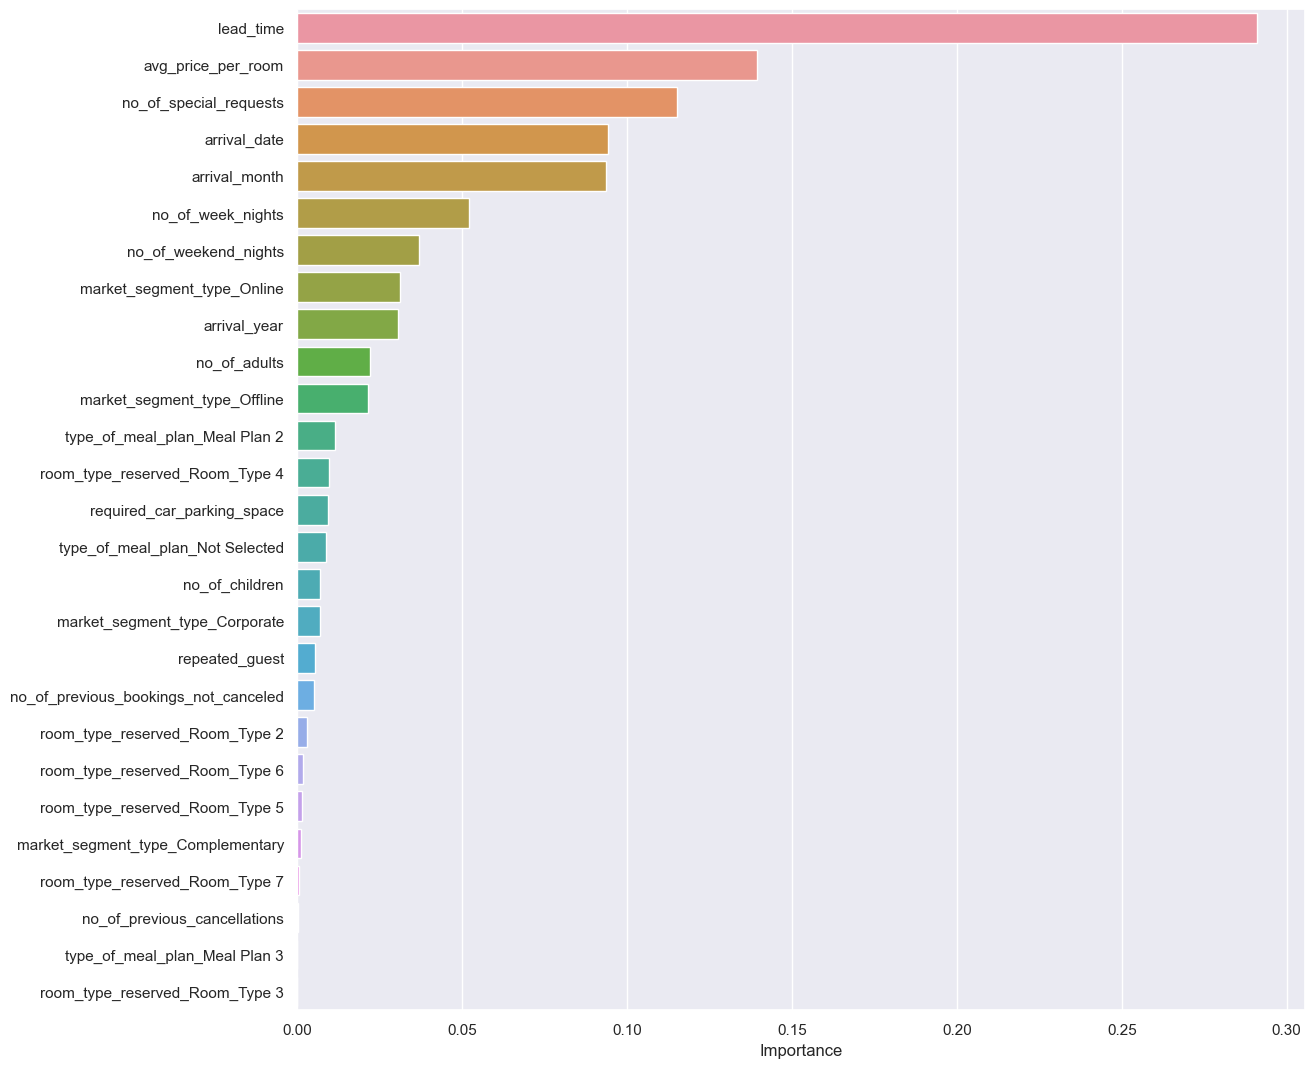

In [74]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

plt.show()

Lead Time, price and requests had biggest impacts on cancellation

### Conclusions

- Buisiness should spend more effort trying to satisfy customers that booked very early as data shows early bookers tend to cancel more often
- Buisiness could lower the average price of rooms to find a sweet spot to avoid cancellations
- Buisinesses should spend more effort trying to earn back customers who have more requests because they are more likely to cancel
- The number of week days and weekends spent determine a person's likelihood of cancelling. Potentially hire more people for busier days. 